In [35]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Path to the Helvetica font file
helvetica_font_path = '../helvetica.ttf'

# Add the font to Matplotlib's font manager
font_manager.fontManager.addfont(helvetica_font_path)

# Update rcParams to use the specific font throughout
plt.rcParams.update({'font.family': 'Helvetica'})

In [149]:
import pandas as pd

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [208]:
df = pd.read_csv('../data/etc_cover_letter_network.csv')
df.dropna(inplace=True)

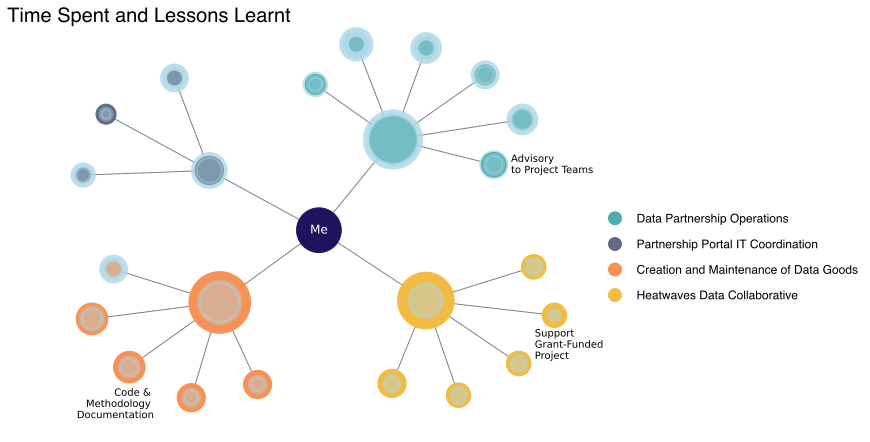

In [229]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# Initialize a NetworkX graph
G = nx.Graph()

# Specify the color for the "Me" node and add nodes and edges
me_color = '#20135D'
G.add_node('Me', color=me_color, size=20, time=0)

for index, row in df.iterrows():
    category = row['Category_id']
    subcategory = row['Subcategory_id']
    color = row['color']
    time_category = row['time_total']
    time_subcategory = row['Time']
    learning_category = row['learning_total']
    learning_subcategory = row['Learning']


    G.add_node(category, color=color, size=learning_category*2, time=time_category)
    G.add_node(subcategory, color=color, size=learning_subcategory*2, time=time_subcategory)

    G.add_edge(category, 'Me')
    G.add_edge(category, subcategory)

# Set the figure size
plt.figure(figsize=(8, 6))

plt.subplots_adjust(left=0, right=0.99, top=0.99, bottom=0)

# Choose a layout
pos = nx.kamada_kawai_layout(G)
#swap = {'B':'D', }

# Drawing nodes

times = [G.nodes[node]['time']*120 for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color='lightblue', linewidths=10, node_size=times, alpha=0.8)


node_sizes = [G.nodes[node]['size']*100 for node in G.nodes if node != 'Me']
# Drawing nodes with colors based on 'color' attribute
node_colors = [G.nodes[node]['color'] for node in G.nodes if node != 'Me']
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes if node != 'Me'], node_color=node_colors, node_size=node_sizes)
# Draw the "Me" node separately with a distinct color
nx.draw_networkx_nodes(G, pos, nodelist=['Me'], node_color='#20135D', node_size=20*100)


nx.draw_networkx_nodes(G, pos, node_color='lightblue', linewidths=4, node_size=times, alpha=0.4)

# Drawing edges
nx.draw_networkx_edges(G, pos, edge_color='grey')

# Specify labels for the "Me" node and two more nodes, keeping them outside
labels_to_show = {'Me': 'Me'}
nx.draw_networkx_labels(G, pos, labels=labels_to_show, font_color='white')

labels_to_show = { 1:'Advisory \nto Project Teams'}

label_pos = {node: (x+0.07, y) for node, (x, y) in pos.items() if node in labels_to_show}
nx.draw_networkx_labels(G, label_pos, labels=labels_to_show, font_color='black', horizontalalignment='left', font_size=10)

labels_to_show = { 12:'Code & \nMethodology \nDocumentation'}
label_pos = {node: (x+0.1, y-0.2) for node, (x, y) in pos.items() if node in labels_to_show}
nx.draw_networkx_labels(G, label_pos, labels=labels_to_show, font_color='black', horizontalalignment='right', font_size=10)

labels_to_show = {  18:'Support\nGrant-Funded\nProject'}
label_pos = {node: (x-0.08, y-0.16) for node, (x, y) in pos.items() if node in labels_to_show}
nx.draw_networkx_labels(G, label_pos, labels=labels_to_show, font_color='black', horizontalalignment='left', font_size=10)

# Creating and displaying the legend in two columns, without frame
color_map = df[['Category', 'color']].drop_duplicates().set_index('Category').to_dict()['color']
legend_labels = {label: plt.Line2D([0], [0], marker='o', color='w', label=label,
                                   markersize=15, markerfacecolor=color) for label, color in color_map.items()}
plt.legend(handles=legend_labels.values(), frameon=False, ncol=1, loc=(0.99,0.3), fontsize=12, labelspacing=1.2)

plt.suptitle('Time Spent and Lessons Learnt', x=0.2, y=0.99, fontsize=20)

plt.axis('off')
plt.savefig('../time_spent.svg', format='svg', bbox_inches='tight', pad_inches=0.1)
plt.show()


